In [3]:
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [9]:
audio, sr = librosa.load('../data/test/TEST_00000.ogg', sr=16000)
audio, sr

(array([-0.00333615, -0.00372012, -0.00350487, ..., -0.03361937,
        -0.03633064, -0.03711037], dtype=float32),
 16000)

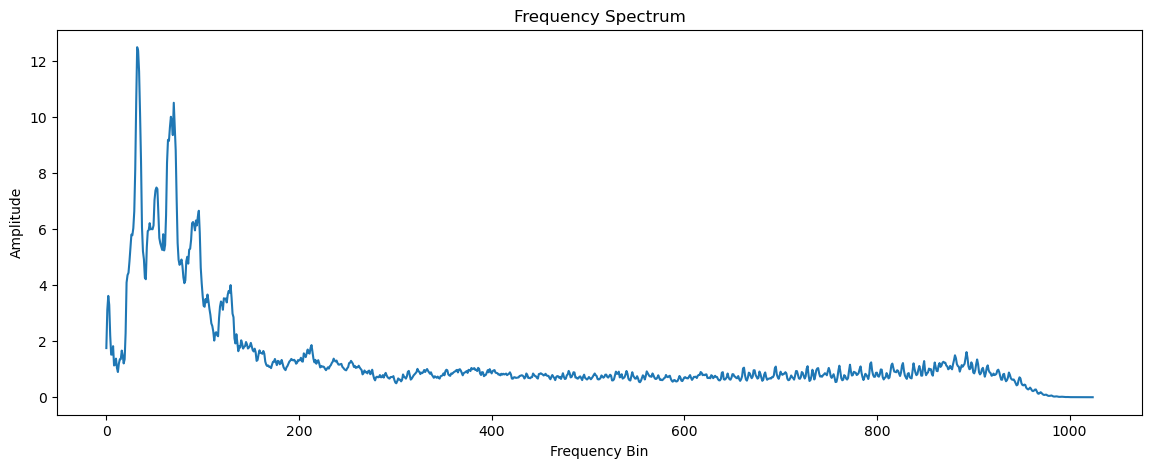

In [12]:
D = np.abs(librosa.stft(audio))
# 주파수 스펙트럼의 평균값 계산
freqs = np.mean(D, axis=1)

# 히스토그램 그리기
plt.figure(figsize=(14, 5))
plt.plot(freqs)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()

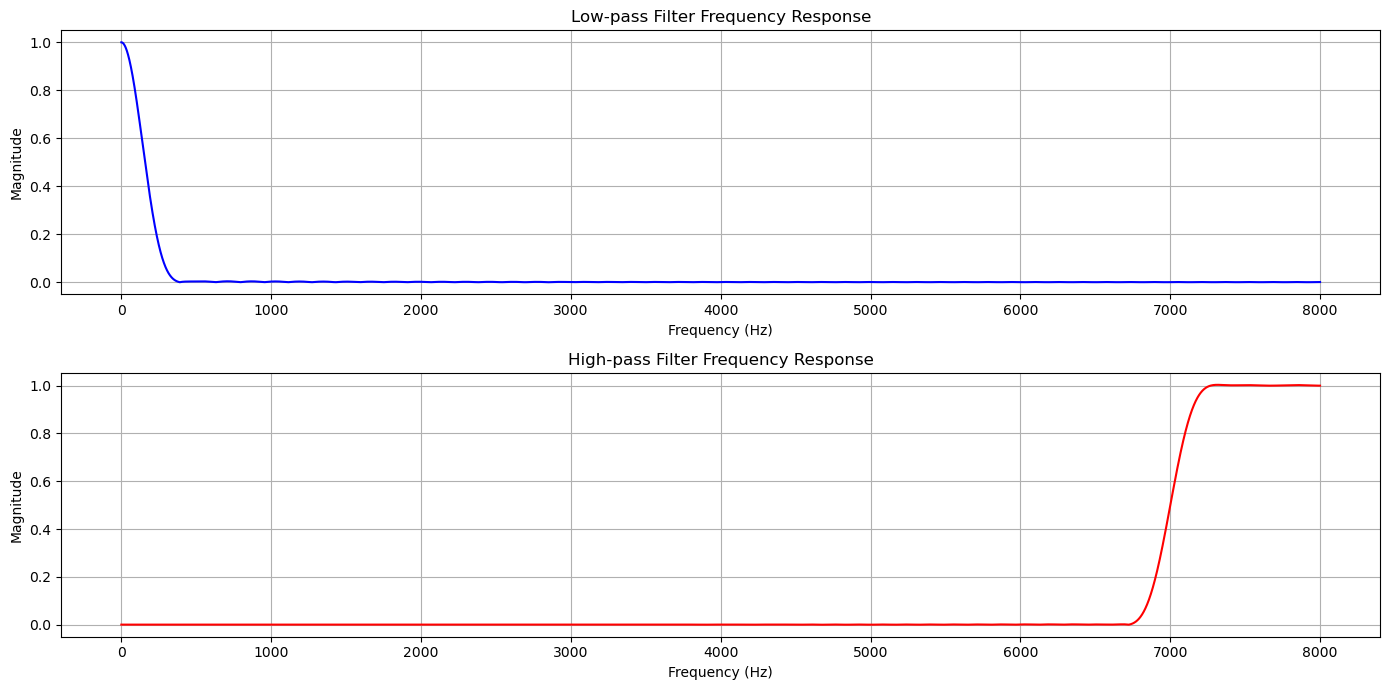

LPF Pass Frequency: 100 Hz
LPF Stop Frequency: 114.40 Hz
HPF Pass Frequency: 7000 Hz
HPF Stop Frequency: 5558.51 Hz


In [15]:
# 샘플링 주파수
fs = 16000

# LPF 및 HPF를 위한 통과 주파수 설정 (Hz)
Fpass_LPF = 100
Fpass_HPF = 7000

# 정지 주파수 설정 (Hz)
Fstop_LPF = np.random.uniform(1.05 * Fpass_LPF, 1.2 * Fpass_LPF)
Fstop_HPF = np.random.uniform(0.5 * Fpass_HPF, 0.8 * Fpass_HPF)

# LPF 설계
numtaps_LPF = 101  # 필터 계수의 개수
lpf = signal.firwin(numtaps_LPF, Fpass_LPF, pass_zero=True, fs=fs)

# HPF 설계
numtaps_HPF = 101  # 필터 계수의 개수
hpf = signal.firwin(numtaps_HPF, Fpass_HPF, pass_zero=False, fs=fs)

# 주파수 응답 계산
w_LPF, h_LPF = signal.freqz(lpf, worN=8000)
w_HPF, h_HPF = signal.freqz(hpf, worN=8000)

# 주파수 응답 그래프 그리기
plt.figure(figsize=(14, 7))

# LPF 응답
plt.subplot(2, 1, 1)
plt.plot(w_LPF * fs / (2 * np.pi), np.abs(h_LPF), 'b')
plt.title('Low-pass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

# HPF 응답
plt.subplot(2, 1, 2)
plt.plot(w_HPF * fs / (2 * np.pi), np.abs(h_HPF), 'r')
plt.title('High-pass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()

# 필터 정보 출력
print(f'LPF Pass Frequency: {Fpass_LPF} Hz')
print(f'LPF Stop Frequency: {Fstop_LPF:.2f} Hz')
print(f'HPF Pass Frequency: {Fpass_HPF} Hz')
print(f'HPF Stop Frequency: {Fstop_HPF:.2f} Hz')


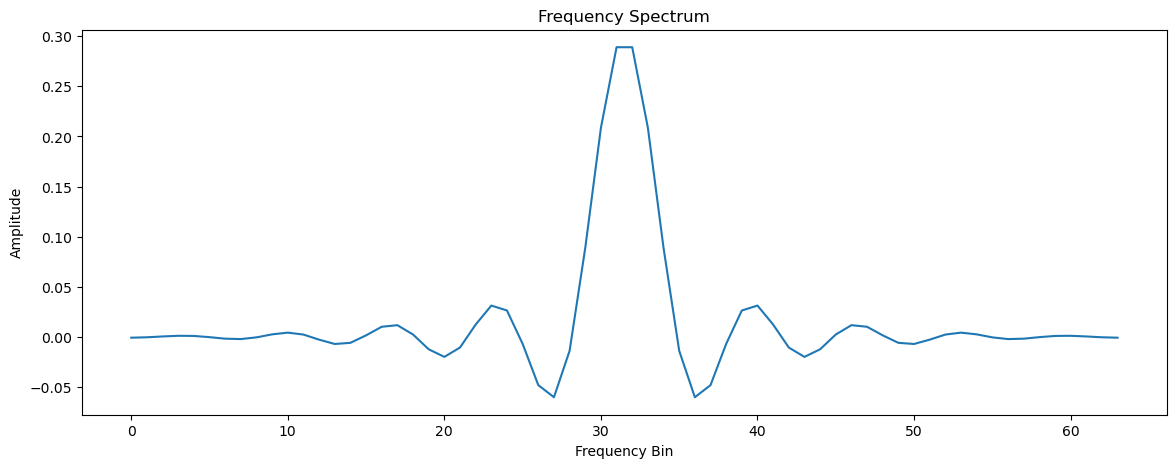

In [14]:
plt.figure(figsize=(14, 5))
plt.plot(a)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()

In [16]:
def estimatefilterlen(fl,fh,fs,db):
    N = int(np.round(db * fs / (22 * (fh-fl)))-1)
    return N

In [20]:
estimatefilterlen(100, 7000, 16000, 50)

4